## Homework 2: NBA Player Salaries 

**Objective**: Perform some basic data analysis techniques using pandas, numpy, seaborn, and matplotlib. Our goal is to complete data analysis on two csv files that contain NBA salaries and performance. Note that you might have to go online to look up some pandas concepts.

**General Note**: You may need to convert values from strings to integers/float, then back to strings.

**Questions**: 

0.) You have two csv files, "players.csv" and "salaries_1985to2018.csv". Read in both as two different dataframes. Merge them based on player name (hint: you have to rename one of the columns). We will be using this dataframe for the following questions. 

1.) Make a line plot of the average salaries by season. Are they increasing over time?

2.) Make a line plot of the average weight by season. Is weight increasing over time?

3.) Compute the average salary for each draft pick round. Are there any trends? 

4.) Take your merged dataframe. Divide the players heights into 2 inch buckets, starting at 6'0. So 6'0 - 6'2, 6'2 - 6'4. Plot a histogram of the buckets. What does the average salary look like per bucket? Heights are stored as a string. This might result in weird behavior when sorting. You may need to convert to inches as an integer, then convert back to strings when plotting. Optional helper function is given below.

5.) Group by player_id and make a scatter plot of the average career FG% vs e_FG%. Notice anything weird? You may need to convert strings to float values.

6.) Group by player_id again, and make a scatter plot of average career FG% vs career FT%. 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# Question 4 helper function 
# helper function to convert feet-inches strings to inches
def feet_inches_to_inches(height_str):
    feet, inches = map(int, height_str.split('-'))
    return feet * 12 + inches


Question 0 Solution:
The merged dataframe is df and is shown below

In [3]:
players = pd.read_csv("players.csv",dtype="object",index_col='index')
salaries = pd.read_csv("salaries_1985to2018.csv",dtype="object",index_col = 'index')
salaries.rename(columns={'_id':'players_id'})
players.rename(columns={"_id":"player_id"},inplace=True)
df = pd.merge(players,salaries, on='player_id')
df.head(3)

,player_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,name,position,shoots,weight,league,salary,season,season_end,season_start,team
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Alaa Abdelnaby,Power Forward,Right,240lb,NBA,395000,1990-91,1991,1990,Portland Trail Blazers
1,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Alaa Abdelnaby,Power Forward,Right,240lb,NBA,494000,1991-92,1992,1991,Portland Trail Blazers
2,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Alaa Abdelnaby,Power Forward,Right,240lb,NBA,500000,1992-93,1993,1992,Boston Celtics


Question 1 Solution:

*The average salary is overall on the increase, but there are some fluctuations. There are two sharp decrease in the image, which is the "1990-91" and "2014-15" two seasons.*

/var/folders/s5/gzgpx4yd20bccw30dhctwcp40000gn/T/ipykernel_1643/2604976708.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(season_df['season'],rotation=90)


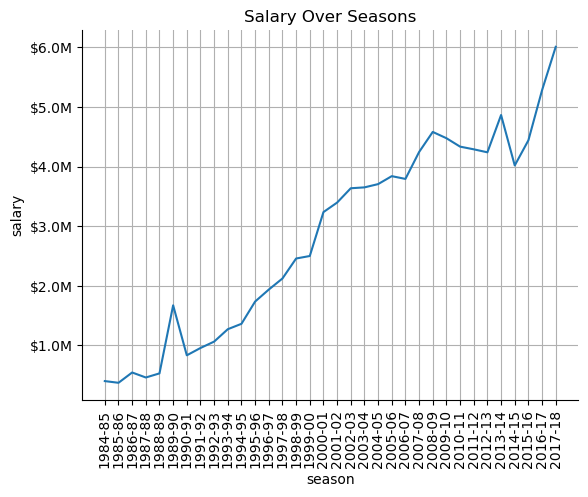

In [38]:
df['salary'] = df['salary'].astype('float64')
seasons = set(df['season'])
season_dict = {}
for i in seasons:
    avg_salary_season = df.loc[df['season'] == i, 'salary'].mean()
 #   avg_salary = avg_salary_season['salary'].mean()
    season_dict[i] = round(avg_salary_season,5)

season_df = pd.DataFrame([season_dict]).T
season_df.columns = ['salaries']
season_df = season_df.reset_index()
season_df = season_df.rename(columns={'index':'season'})
season_df['salaries'] = season_df['salaries']/10e5
season_df = season_df.sort_values(by=['season'])
fig, ax = plt.subplots()

ax.grid()
ax.plot(season_df['season'],season_df['salaries'])
ax.set_xticklabels(season_df['season'],rotation=90)
ax.set_xlabel("season")
# get the y tickers:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([1,2,3,4,5,6])
ax.set_yticklabels(['$1.0M','$2.0M','$3.0M','$4.0M','$5.0M','$6.0M'])
ax.set_ylabel("salary")
ax.set_title("Salary Over Seasons")
plt.show()

Question 2 Solution:

*The average weight is on the increase overall. Before "2004-05" season, there was a relatively significant increase in the average salary. After that, the increase of average salary is smaller, showing a fluctuating upward trend.*

In [5]:
df['weight'] = df['weight'].apply(lambda x: x[0:3])
df['weight'] = df['weight'].astype('float64')

/var/folders/s5/gzgpx4yd20bccw30dhctwcp40000gn/T/ipykernel_1643/492708804.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(season_df['season'],rotation=90)


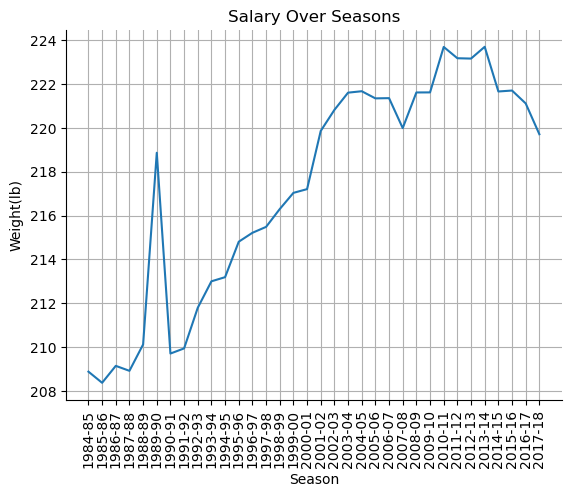

In [40]:
seasons = set(df['season'])
season_dict = {}
for i in seasons:
    avg_weight_season = df.loc[df['season'] == i, 'weight'].mean()
 #   avg_salary = avg_salary_season['salary'].mean()
    season_dict[i] = avg_weight_season

season_df = pd.DataFrame([season_dict]).T
season_df.columns = ['weight']
season_df = season_df.reset_index()
season_df = season_df.rename(columns={'index':'season'})
season_df = season_df.sort_values(by=['season'])
fig, ax = plt.subplots()

ax.grid()
ax.plot(season_df['season'],season_df['weight'])
ax.set_xticklabels(season_df['season'],rotation=90)
ax.set_xlabel("Season")
# get the y tickers:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Weight(lb)")
ax.set_title("Salary Over Seasons")
plt.show()

Question 3 Solution


*With the increase in the draft round, the average salary is on the decrease overall, showing a fluctuating downward trend. In the first 3 round, there is a sharp decrease, dropping by around 2.5million dollars. After the third round, the decline becomes much slower, with the decrease not exceeding 1 million.*

/var/folders/s5/gzgpx4yd20bccw30dhctwcp40000gn/T/ipykernel_1643/163455176.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(draft_df['draft_round'],rotation=45)


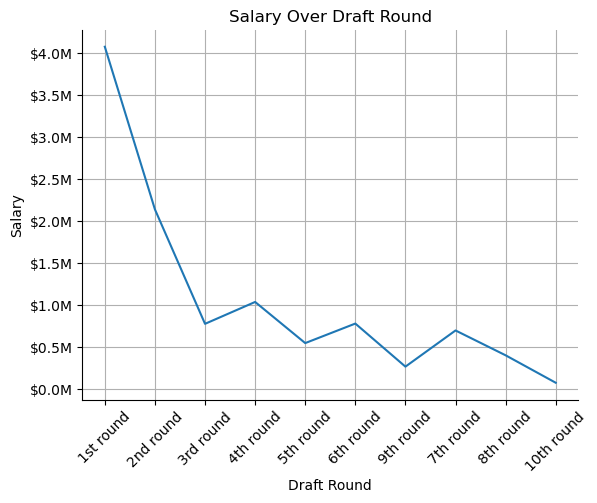

In [41]:
df['draft_round'].isnull().sum()
df['draft_round'].dropna()
df['salary'] = df['salary'].astype('float64')
draft_rounds = set(df['draft_round'])
draft_dict = {}
for i in draft_rounds:
    avg_salary_draft = df.loc[df['draft_round'] == i, 'salary'].mean()
 #   avg_salary = avg_salary_season['salary'].mean()
    draft_dict[i] = round(avg_salary_draft,5)
draft_df = pd.DataFrame([draft_dict]).T
draft_df.columns = ['salaries']
draft_df = draft_df.reset_index()
draft_df = draft_df.rename(columns={'index':'draft_round'})
draft_df['salaries'] = draft_df['salaries']/10e5
draft_df = draft_df.sort_values(by=['draft_round'])

draft_df = draft_df.dropna()

for i in range(draft_df.shape[0]):
    try:
        temp = draft_df.loc[i,'draft_round'][0:-8]
        draft_df.loc[i,'rank'] = temp
    except:
        pass

draft_df.fillna(6,inplace=True)
draft_df['rank'] = draft_df['rank'].astype('int')
draft_df = draft_df.sort_values(by=['rank'])


fig, ax = plt.subplots()
# draft_df['salaries'].astype('int')
ax.grid()
ax.plot(draft_df['draft_round'],draft_df['salaries'])
ax.set_xticklabels(draft_df['draft_round'],rotation=45)
ax.set_xlabel("Draft Round")
#ax.set_xticks([9,0,1,2,3,4,5,6,7,8])
#ax.set_xticklabels(['1st round', '2nd round', '3rd round', '4th round','5th round', '6th round', '7th round','8th round','9th round','10th round'])
# get the y tickers:
yticks = [0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]
yticklabels = ['$0.0M','$0.5M','$1.0M','$1.5M','$2.0M','$2.5M','$3.0M','$3.5M','$4.0M']
plt.yticks(ticks = yticks,labels = yticklabels)
ax.set_ylabel("Salary")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Salary Over Draft Round")
plt.show()

Take your merged dataframe. Divide the players heights into 2 inch buckets, starting at 6'0. So 6'0 - 6'2, 6'2 - 6'4. Plot a histogram of the buckets. What does the average salary look like per bucket? Heights are stored as a string. This might result in weird behavior when sorting. You may need to convert to inches as an integer, then convert back to strings when plotting. Optional helper function is given below.

Question 4 Solutions: 

In [13]:
bucket_size = 2
bucket_start = feet_inches_to_inches("6-0")
bucket_end = feet_inches_to_inches(df['height'].max())
bucket_labels = []
# use the function to change feet into inches
for h in range(df['height'].shape[0]):
   df.loc[h,'height_inches'] = feet_inches_to_inches(df.loc[h,'height'])
   inch = df.loc[h,'height_inches']
   bucket_label= inch-(inch%bucket_size)
   if bucket_label>=bucket_start:
      bucket_labels.append(bucket_label)

height_data = df.loc[(df['height_inches']>=bucket_start),['height_inches','salary']]
average_of_total_height = height_data['salary'].mean()/10e5
average_of_total_height # million

3.189247217933021

/var/folders/s5/gzgpx4yd20bccw30dhctwcp40000gn/T/ipykernel_1643/1789121960.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  height_data = height_data.groupby(['height_buckets'])['salary'].mean().reset_index()
/var/folders/s5/gzgpx4yd20bccw30dhctwcp40000gn/T/ipykernel_1643/1789121960.py:22: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  height_data = height_data.replace("5'11-6'2","6'0-6'2")
/var/folders/s5/gzgpx4yd20bccw30dhctwcp40000gn/T/ipykernel_1643/1789121960.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

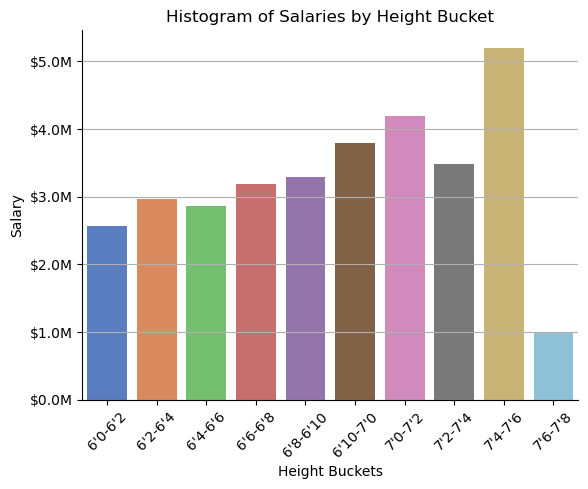

In [47]:
bucket_size = 2
bucket_start = feet_inches_to_inches("6-0")
bucket_end = feet_inches_to_inches(df['height'].max())
bucket_labels = []
# use the function to change feet into inches
for h in range(df['height'].shape[0]):
   df.loc[h,'height_inches'] = feet_inches_to_inches(df.loc[h,'height'])
   inch = df.loc[h,'height_inches']
   bucket_label= inch-(inch%bucket_size)
   if bucket_label>=bucket_start:
      bucket_labels.append(bucket_label)

height_data = df.loc[(df['height_inches']>=bucket_start),['height_inches','salary']]
average_of_total_height = height_data['salary'].mean()
bins_edge = range(bucket_start,(bucket_end+2),2)
height_data.loc[:,'height_buckets'] = pd.cut(df.loc[:,'height_inches'],bins =bins_edge,include_lowest=True)
# height_data = height_data.groupby(['height_buckets'])['salary'].mean().reset_index()
height_data = height_data.groupby(['height_buckets'])['salary'].mean().reset_index()
# height_data['salary'] = height_data['salary']/2
height_data['salary'] = height_data['salary']/10e5
height_data['height_buckets'] = height_data['height_buckets'].apply(lambda x: f"{int(x.left//12)}'{int(x.left%12)}-{int(x.right//12)}'{int(x.right%12)}")
height_data = height_data.replace("5'11-6'2","6'0-6'2")
plt.grid()
sns.barplot(height_data,x="height_buckets",y="salary",palette='muted')
sns.despine()
yticks = [0,1,2,3,4,5]
ticklabels = ['$0.0M','$1.0M','$2.0M','$3.0M','$4.0M','$5.0M']
plt.yticks(ticks = yticks, labels=ticklabels)
plt.title("Histogram of Salaries by Height Bucket")
plt.xlabel("Height Buckets")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.show()

Question 5 Solution

Group by player_id and make a scatter plot of the average career FG% vs e_FG%. Notice anything weird? You may need to convert strings to float values.

Text(0.5, 1.0, 'Scatterplot of Career FG% vs Career eFG%')

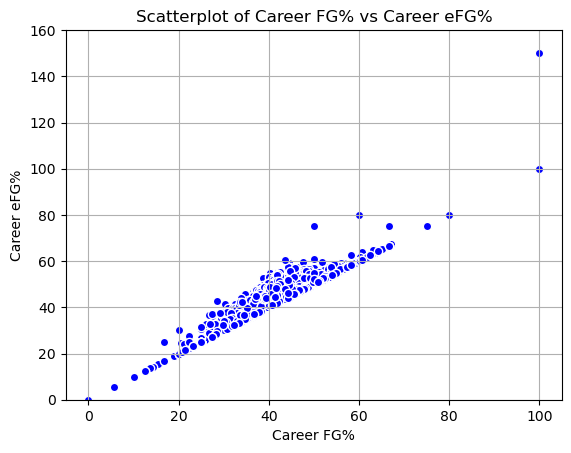

In [16]:
# convert string to float value,
df['career_FG%']=df['career_FG%'].replace('-',0.0)
df['career_eFG%']=df['career_eFG%'].replace('-',0.0)
df['career_FG%'] = df['career_FG%'].astype('float64')
df['career_eFG%'] = df['career_eFG%'].astype('float64')


FG_group = df.groupby('player_id')[['career_FG%','career_eFG%']].mean().reset_index()
FG_data = FG_group['career_FG%']
eFG_data = FG_group['career_eFG%']
plt.grid()
plt.scatter(FG_data,eFG_data,color='blue',edgecolors='white')
plt.xlabel("Career FG%")
plt.ylabel("Career eFG%")
plt.ylim(0,160.0)
plt.title("Scatterplot of Career FG% vs Career eFG%")

Question 6 Solution

In [17]:
df['career_FT%']=df['career_FT%'].replace('-',0.0)

Text(0.5, 1.0, 'Scatterplot of Career FG% vs Career FT%')

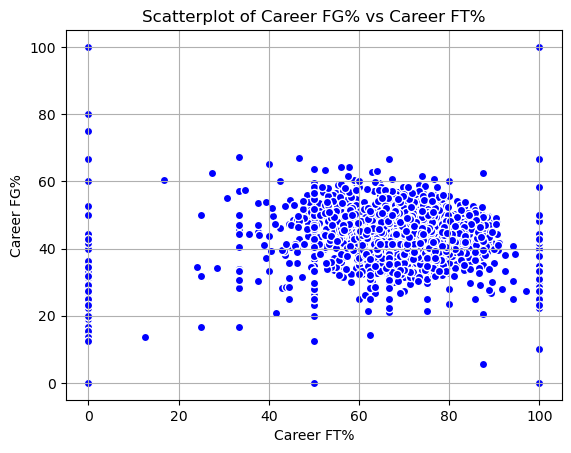

In [18]:
df['career_FT%']=df['career_FT%'].replace('-',0.0)
# df['career_eFG%']=df['career_eFG%'].replace('-',0.0)
df['career_FT%'] = df['career_FT%'].astype('float64')
# df['career_eFG%'] = df['career_eFG%'].astype('float64')


FT_group = df.groupby('player_id')[['career_FG%','career_FT%']].mean().reset_index()
FG_data = FT_group['career_FG%']
FT_data = FT_group['career_FT%']
plt.grid()
plt.scatter(FT_data,FG_data,color='blue',edgecolors='white')
plt.xlabel("Career FT%")
plt.ylabel("Career FG%")
plt.title("Scatterplot of Career FG% vs Career FT%")